This is my first attempt on a simple linear regression model to predict housing prices. Still working on improving the accuracy of the model though. This is very simple code with not much functionality. 

In [1]:
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
#Importing DataSet 
df = pd.read_csv("kc_house_data.csv")
space=df['sqft_living']
price=df['price']

X= np.array(space).reshape(-1, 1)
y = np.array(price)



In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)




In [5]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predicting the prices
pred = regressor.predict(X_test)



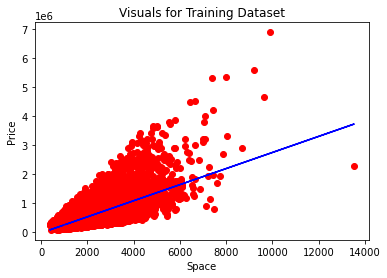

In [6]:
#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()



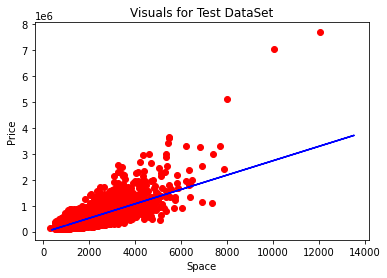

In [7]:
#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()


# OLS Regression method

In [8]:
import statsmodels.api as sm
import pandas as pd


model=sm.OLS(y_train,X_train).fit()
model_prediction=model.predict(X_train)

model_details=model.summary()
print(model_details)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                          9.098e+04
Date:                Wed, 30 Sep 2020   Prob (F-statistic):                        0.00
Time:                        13:15:19   Log-Likelihood:                     -2.4012e+05
No. Observations:               17290   AIC:                                  4.802e+05
Df Residuals:                   17289   BIC:                                  4.803e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

1. The coefficient of determination, or R-Squared, is a measure that provides information about the goodness of fit of a model. In the context of regression it is a statistical measure of how well the regression line approximates the actual data. It is therefore important when a statistical model is used either to predict future outcomes or in the testing of hypotheses.
2. 